In [1]:
import matplotlib.pyplot as plt
from capstone.data.data_module import MiccaiDataModule2D
from capstone.paths import DEFAULT_DATA_STORAGE
from capstone.training.base_trainer import BaseUNet2D
from capstone.training.mixup_trainer import MixupUNet2D
from capstone.utils.utils import AttrDict
from pytorch_lightning import Trainer, seed_everything

%matplotlib inline

SEED = 12342

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Set SLURM handle signals.

  | Name      | Type                | Params
--------------------------------------------------
0 | conv1x1   | Conv2d              | 4     
1 | unet      | UNet                | 26.0 M
2 | loss_func | MultipleLossWrapper | 0     


Suggested LR: 0.5754399373371567



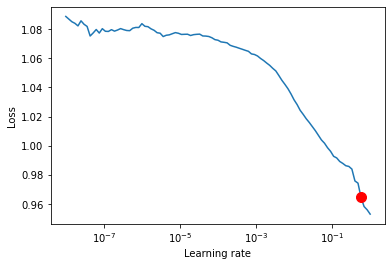

In [2]:
CONFIG = AttrDict()
CONFIG.BATCH_SIZE = 128
CONFIG.TRANSFORM_DEGREE = 0
CONFIG.FILTERS = [64, 128, 256, 512, 1024]
CONFIG.USE_RES_UNITS = True
CONFIG.LR = 0.001
CONFIG.LOSS_FX = ["Focal", "Dice"]
CONFIG.EXCLUDE_MISSING = True
CONFIG.MIXUP = False

def main():
    seed_everything(SEED)

    # Data
    miccai_2d = MiccaiDataModule2D(
        batch_size=CONFIG.BATCH_SIZE,
        transform_degree=CONFIG.TRANSFORM_DEGREE,
        enhanced="Boundary" in CONFIG.LOSS_FX
    )
    
    _model = MixupUNet2D if CONFIG.MIXUP else BaseUNet2D

    # Model
    model = _model(
        filters=CONFIG.FILTERS,
        use_res_units=CONFIG.USE_RES_UNITS,
        lr=CONFIG.LR,
        loss_fx=CONFIG.LOSS_FX,
        exclude_missing=CONFIG.EXCLUDE_MISSING,
        batch_size=CONFIG.BATCH_SIZE,
        transform_degree=CONFIG.TRANSFORM_DEGREE,
    )

    # Trainer
    trainer = Trainer(gpus=1, default_root_dir=DEFAULT_DATA_STORAGE)

    lr_finder = trainer.tuner.lr_find(model, miccai_2d)
    print(f"Suggested LR: {lr_finder.suggestion()}")
    fig = lr_finder.plot(suggest=True)
    
main()

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Set SLURM handle signals.

  | Name      | Type                | Params
--------------------------------------------------
0 | conv1x1   | Conv2d              | 4     
1 | unet      | UNet                | 13.4 M
2 | loss_func | MultipleLossWrapper | 0     


Suggested LR: 0.025118864315095822



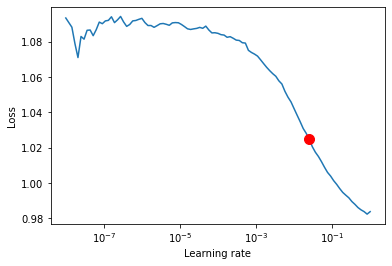

In [2]:
CONFIG = AttrDict()
CONFIG.BATCH_SIZE = 128
CONFIG.TRANSFORM_DEGREE = 0
CONFIG.FILTERS = [64, 128, 256, 512, 1024]
CONFIG.USE_RES_UNITS = True
CONFIG.LR = 0.001
CONFIG.LOSS_FX = ["Focal", "Dice", "Boundary"]
CONFIG.EXCLUDE_MISSING = True
CONFIG.MIXUP = True

def main():
    seed_everything(SEED)

    # Data
    miccai_2d = MiccaiDataModule2D(
        batch_size=CONFIG.BATCH_SIZE,
        transform_degree=CONFIG.TRANSFORM_DEGREE,
        enhanced="Boundary" in CONFIG.LOSS_FX
    )
    
    _model = MixupUNet2D if CONFIG.MIXUP else BaseUNet2D

    # Model
    model = _model(
        filters=CONFIG.FILTERS,
        use_res_units=CONFIG.USE_RES_UNITS,
        lr=CONFIG.LR,
        loss_fx=CONFIG.LOSS_FX,
        exclude_missing=CONFIG.EXCLUDE_MISSING,
        batch_size=CONFIG.BATCH_SIZE,
        transform_degree=CONFIG.TRANSFORM_DEGREE,
    )

    # Trainer
    trainer = Trainer(gpus=1, default_root_dir=DEFAULT_DATA_STORAGE)

    lr_finder = trainer.tuner.lr_find(model, miccai_2d)
    print(f"Suggested LR: {lr_finder.suggestion()}")
    fig = lr_finder.plot(suggest=True)
    
main()